# Working on Real Project with Python on 'COVID-19 Dataset'

## (A part of Big Data Analysis)

----

# COVID-19 SMALL DATASET

-----

We have taken a small dataset of Covid-19, just for your understaning purpose. You have to work on the original dataset which contains about 19000 rows.

The data used here is till 29-April-2020 and has records as on 29-April-2020.

This data is available as a CSV file, downloaded from Kaggle.

We will analyze this data using the Pandas DataFrame.

In [1]:
import pandas as pd

<ipython-input-1-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [85]:
data = pd.read_csv("csv_files/covid_data.csv", index_col = "index")

In [86]:
data

,Date,State,Region,Confirmed,Deaths,Recovered
index,,,,,,
0,2020-01-22,Anhui,China,1,0,0
1,2020-01-22,Beijing,China,14,0,0
2,2020-01-22,Chongqing,China,6,0,0
3,2020-01-22,Fujian,China,1,0,0
4,2020-01-22,Guangdong,China,26,0,0
...,...,...,...,...,...,...
39004,2020-07-27,NaN,Sao Tome and Principe,865,14,734
39005,2020-07-27,NaN,Yemen,1691,483,833
39006,2020-07-27,NaN,Comoros,354,7,328


In [88]:
data.shape

(39009, 6)

1. 
df.count()
df.isnull().sum()

In [89]:
data.count()

Date         39009
State        12561
Region       39009
Confirmed    39009
Deaths       39009
Recovered    39009
dtype: int64

In [90]:
data.isnull().sum()

Date             0
State        26448
Region           0
Confirmed        0
Deaths           0
Recovered        0
dtype: int64

In [255]:
# 2.
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.heatmap(df.isnull())
# plt.show()

In [96]:
%pip install seaborn

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

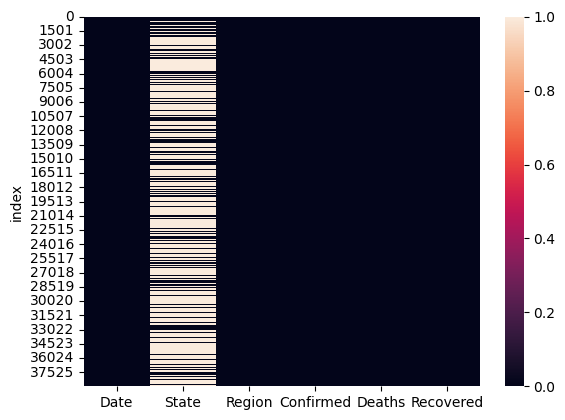

In [98]:
sns.heatmap(data.isnull())
plt.show()

### Q.1 ) Show the number of Confirmed , Deaths and Recovered cases in each Region.

In [107]:
ill = data.groupby("Region").sum(numeric_only = True)
ill["Active"] = ill["Confirmed"] - (ill["Recovered"] + ill["Deaths"])
ill

,Confirmed,Deaths,Recovered,Active
Region,,,,
Afghanistan,1936390,49098,798240,1089052
Albania,196702,5708,118877,72117
Algeria,1179755,77972,755897,345886
Andorra,94404,5423,69074,19907
Angola,22662,1078,6573,15011
...,...,...,...,...
West Bank and Gaza,233461,1370,61124,170967
Western Sahara,901,63,648,190
Yemen,67180,17707,23779,25694


### Top 10 Infected Regions

In [115]:
data.groupby("Region")['Confirmed'].sum().sort_values(ascending = False).head(10)

Region
US                224345948
Brazil             89524967
Russia             45408411
India              40883464
Spain              27404045
United Kingdom     26748587
Italy              26745145
France             21210926
Germany            21059152
Iran               19339267
Name: Confirmed, dtype: int64

In [119]:
data.groupby("Region")[['Confirmed', 'Recovered']].sum().sort_values(by = "Confirmed", ascending = False).head(10)

,Confirmed,Recovered
Region,,
US,224345948,56353416
Brazil,89524967,54492873
Russia,45408411,25120448
India,40883464,23783720
Spain,27404045,15093583
United Kingdom,26748587,126217
Italy,26745145,15673910
France,21210926,7182115
Germany,21059152,17107839


### Q2) Remove all the records where Confirmed Cases is Less Than 10.

In [120]:
data = data[~(data["Confirmed"] < 10)]
data

,Date,State,Region,Confirmed,Deaths,Recovered
index,,,,,,
1,2020-01-22,Beijing,China,14,0,0
4,2020-01-22,Guangdong,China,26,0,0
10,2020-01-22,Hubei,China,444,17,28
23,2020-01-22,Zhejiang,China,10,0,0
30,2020-01-23,Beijing,China,22,0,0
...,...,...,...,...,...,...
39004,2020-07-27,NaN,Sao Tome and Principe,865,14,734
39005,2020-07-27,NaN,Yemen,1691,483,833
39006,2020-07-27,NaN,Comoros,354,7,328


### Q.3) In which Region, maximum number of Confirmed cases were recorded ?

In [121]:
data.groupby("Region")["Confirmed"].sum().sort_values(ascending = False).head(1)

Region
US    224345894
Name: Confirmed, dtype: int64

### Q.4) In which Region, minimum number of Deaths cases were recorded ?

In [133]:
data.groupby("Region")[["Confirmed", "Deaths"]].sum().sort_values(by = "Deaths", ascending = True).head(10)

,Confirmed,Deaths
Region,,
Fiji,2200,0
Cambodia,17000,0
Dominica,2047,0
Eritrea,11760,0
Seychelles,3876,0
Greenland,1473,0
Grenada,2405,0
Timor-Leste,2444,0
Holy See,1082,0


### Q.5) How many Confirmed , Deaths & Recovered cases were reported from India till 29 April 2020 ?

In [130]:
data.query('Region == "India" and Date <= "2020-04-29"').groupby("Region").sum(numeric_only = True)

,Confirmed,Deaths,Recovered
Region,,,
India,422983,13489,77552


### Q. 6-A ) Sort the entire data wrt No. of Confirmed cases in ascending order.

In [134]:
data.sort_values(by = "Confirmed", ascending = True)

,Date,State,Region,Confirmed,Deaths,Recovered
index,,,,,,
3819,2020-03-11,NaN,Latvia,10,0,1
2350,2020-02-29,Macau,China,10,0,8
33783,2020-07-07,NaN,Western Sahara,10,1,8
16255,2020-05-01,NaN,Suriname,10,1,8
12125,2020-04-15,NaN,Suriname,10,1,6
...,...,...,...,...,...,...
37927,2020-07-23,NaN,US,4038816,144430,1233269
38188,2020-07-24,NaN,US,4112531,145560,1261624
38449,2020-07-25,NaN,US,4178970,146465,1279414


### Q. 6-B ) Sort the entire data wrt No. of Recovered cases in descending order.

In [137]:
data.sort_values(by = 'Recovered', ascending = False)
data.groupby('Region').sum(numeric_only = True).sort_values(by = 'Recovered', ascending = False)

,Confirmed,Deaths,Recovered
Region,,,
US,224345894,11011411,56353416
Brazil,89524948,3938034,54492873
Russia,45408336,619385,25120402
India,40883365,1111831,23783669
Germany,21059126,871322,17107839
...,...,...,...
Timor-Leste,2444,0,0
Mozambique,57950,361,0
Syria,20914,972,0


---

---

---

## Solved by Dias Onaibaev

### By - Rohit Grewal